In [160]:
import numpy as np
import numpy.random as random
import networkx as nx
import matplotlib.pyplot as plt

In [161]:
def hc_scale_free_graph(n, m=3, a=0.5, directed=True, seed=None):
    if n < m: raise ValueError('The total number of nodes should be greater or equal than the initial number of nodes.')
    
    ## Creation of the fully connected graph of m active nodes
    G = nx.DiGraph() if directed else nx.Graph()
    
    for x in range(m):
        for y in range(x+1,m):
            G.add_edge(x,y)
            if directed: G.add_edge(y,x)
    
    active_nodes = list(range(m))     # List of active nodes
    k = {x: m-1 for x in range(m)}   # In degree dictionary
    
    ## Growth and deactivation algorithm
    i = m
    
    if seed is not None:
        random.seed(seed)
    
    while i < n:
        
        # Growth
        G.add_node(i)
        k[i] = 0
        for j in active_nodes:
            G.add_edge(i,j)
            k[j] += 1

        active_nodes.append(i)
        
        # Deactivation
        probs = [1/(a + k[j]) for j in active_nodes]
        norm = sum(probs)
        
        u = random.rand()*norm
        h = 0.0
        for j, p in enumerate(probs):
            h += p
            if u<=h:
                active_nodes.pop(j)
                break
        i += 1
    
    return G

In [162]:
Graph = hc_scale_free_graph(100, m=10, a=10, directed=False, seed=None)

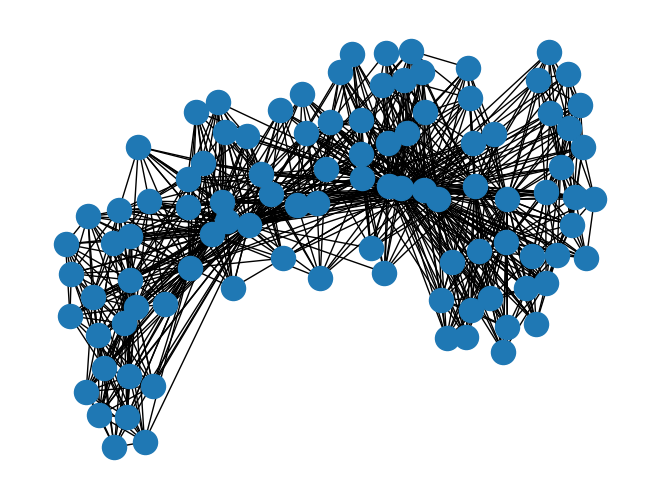

In [163]:
nx.draw(Graph)

In [156]:
ccl1 = []
ccl2 = []
nods = list(map(int,np.logspace(1, 4, num=50)))
for l in nods:
    Graph1 = hc_scale_free_graph(l, m=10, a=10, directed=False, seed=43254)
    Graph2 = hc_scale_free_graph(l, m=2, a=2, directed=False, seed=70982)
    ccl1.append(nx.average_clustering(Graph1))
    ccl2.append(nx.average_clustering(Graph2))

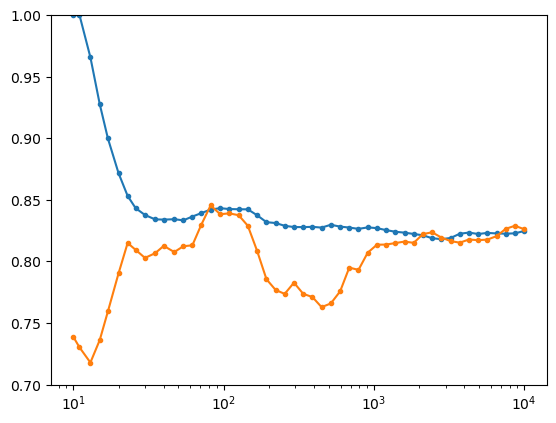

In [157]:
plt.figure()
plt.semilogx(nods,ccl1,marker='.')
plt.semilogx(nods,ccl2,marker='.')
plt.ylim(0.7,1.0)
plt.show()